<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [ ]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

    **R:** Predominan las películas, esto podría significar que buscan una estrategia más esporádica, pues las series suelen implicar una retención de usuarios mientras que las películas son ocasionales pero con mayor variedad.

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

    **R:** Hay mucho más contenido reciente. Entre los 2000 y 2020 podríamos pensar en algún comportamiento exponencial, pues comenzamos con muy pocas y terminamos con muchas. En cambio, entre los 1980 y 2000 el patrón se parece más a una recta lineal con una pendiente muy pequeña.

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?

    **R:** La clasificación más común es TV-MA, lo que indicaría que Netflix está orientado a un público adulto, pero le sigue muy de cerca la clasificación TV-14, por lo que también tiene harto enfoque en un público infantil.


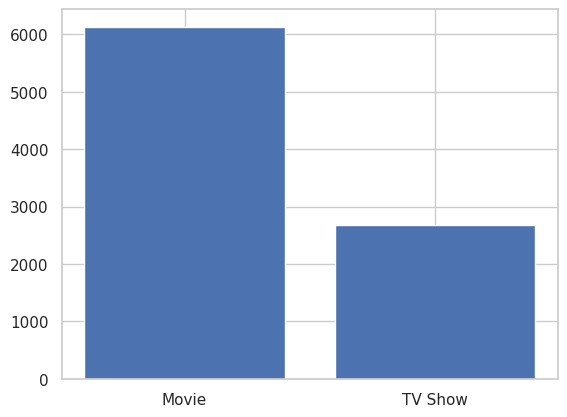

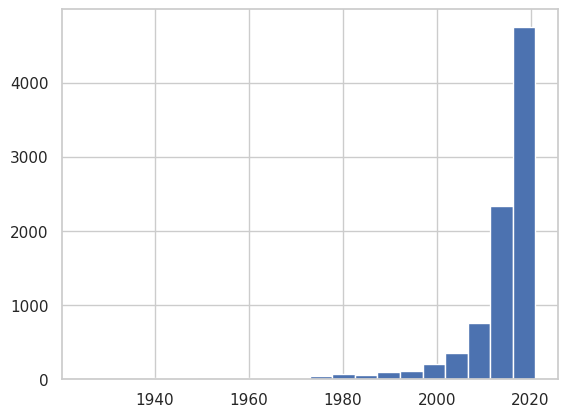

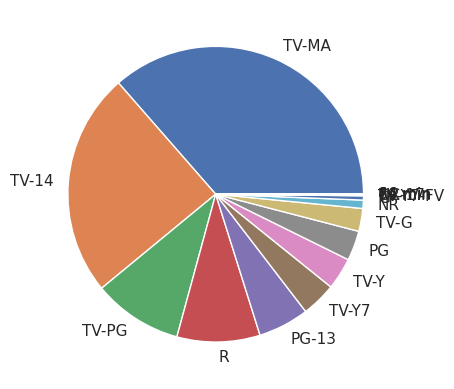

In [ ]:
# FIXME
# 1.
plt.bar(df['type'].value_counts().index, df['type'].value_counts().values)
plt.show()

# 2.
plt.hist(df['release_year'], bins=20)
plt.show()

# 3.
plt.pie(df['rating'].value_counts().values, labels=df['rating'].value_counts().index)
plt.show()



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

    **R:** Su mayor crecimiento fue alrededor del año 2019, lo cual es próximo al inicio de la pandemia por el COVID, período en el cual la gente no frecuentaba salir de su hogar.

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

    **R:** Los meses con más estrenos son Junio, Julio y Agosto, los cuales coinciden con la estación de verano en el hemisferio norte y cuando las personas tienen más tiempo libre, es decir, hay más demanda por entretenimiento.

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?

    **R:** Los géners que más suelen durar son Action & Adventure y International Movies. Algunos géneros como Drama, Comedies y Documentaries presentan una variabilidad muy alta con muchos outlier, en cambio, otros géneros como Romantics Movies, LGBTQ Movies y Sports Movies tienen muy poca variabilidad en sus duraciones.


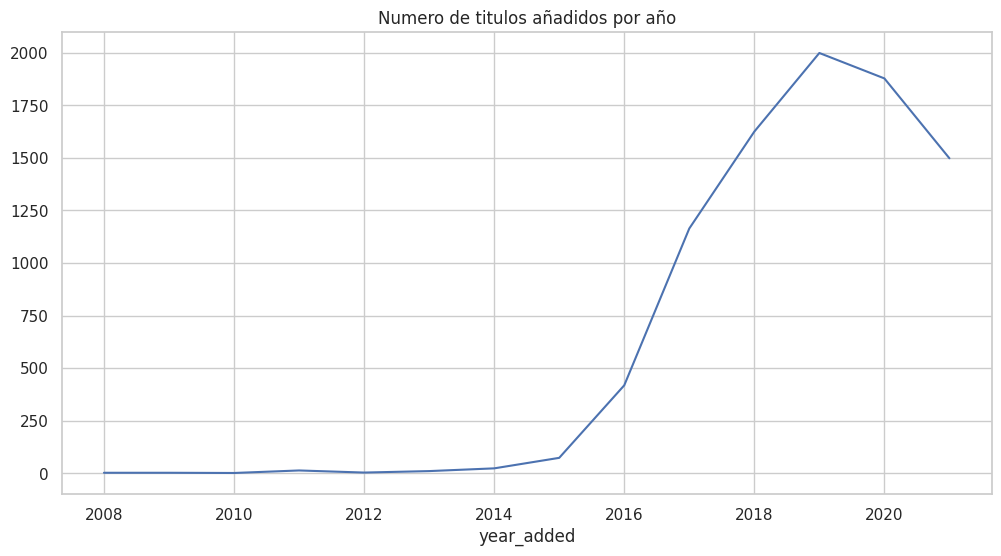

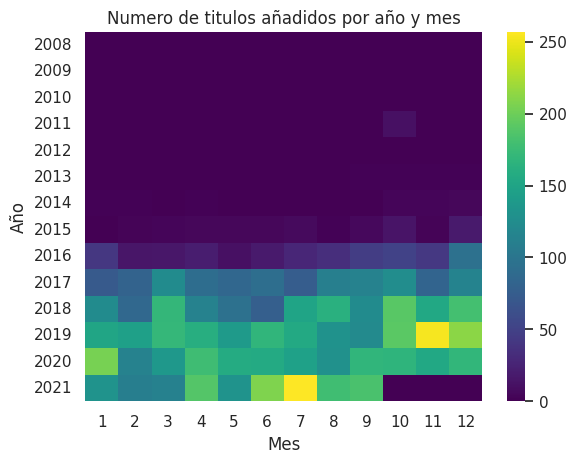

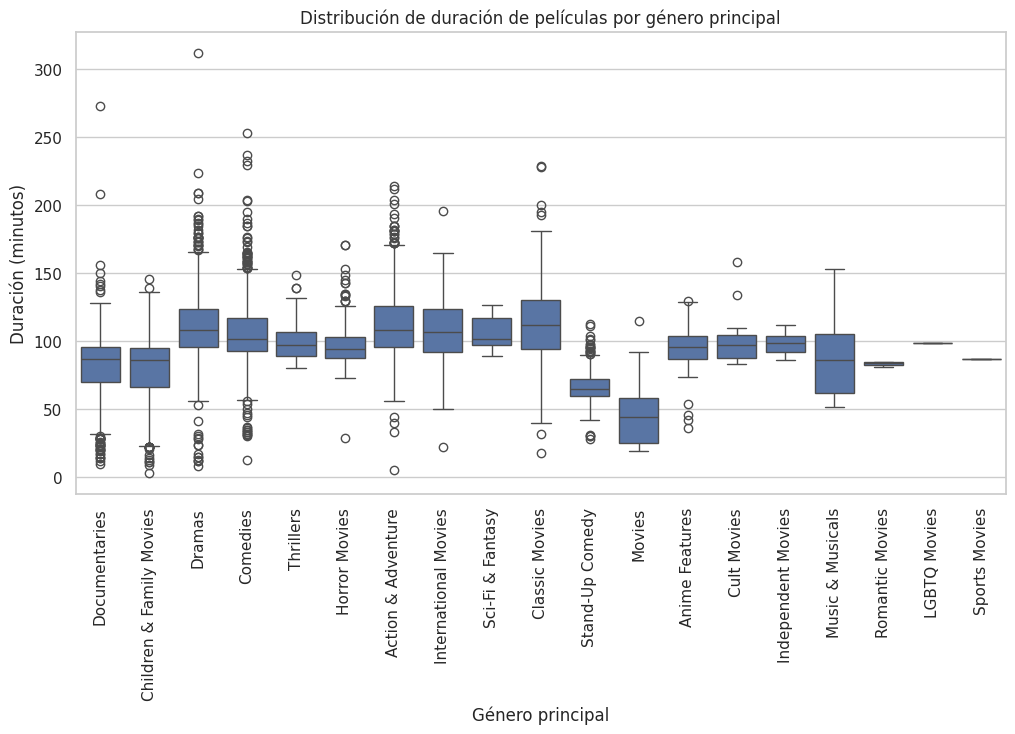

In [ ]:
# FIXME

# 4.
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(12, 6))
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title('Numero de titulos añadidos por año')
plt.show()

# 5.
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
heatmap_data = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Numero de titulos añadidos por año y mes')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()

# 6.
movies = df[df['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract(r'(\d+)').astype(float)
movies['main_genre'] = movies['listed_in'].str.split(',').str[0]

plt.figure(figsize=(12,6))
sns.boxplot(data=movies, x='main_genre', y='duration_min')
plt.xticks(rotation=90)
plt.title("Distribución de duración de películas por género principal")
plt.ylabel("Duración (minutos)")
plt.xlabel("Género principal")
plt.show()



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

   **R:** Estados unidos lidera por mucho la lista de paises, lo que era esperable dado el origen de la plataforma.

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

   **R:** Si, como son los géneros de International Movies, Dramas y Comedies que están más relacionado a películas.

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?

   **R:** Si bien hubo un aumento en la duración desde el año 1940, actualmente el estándar es bastante amplio y disperso. Se pueden apreciar dos outliers curiosos, uno muy cercano a los 0 minutos y otro sobre los 300 minutos.



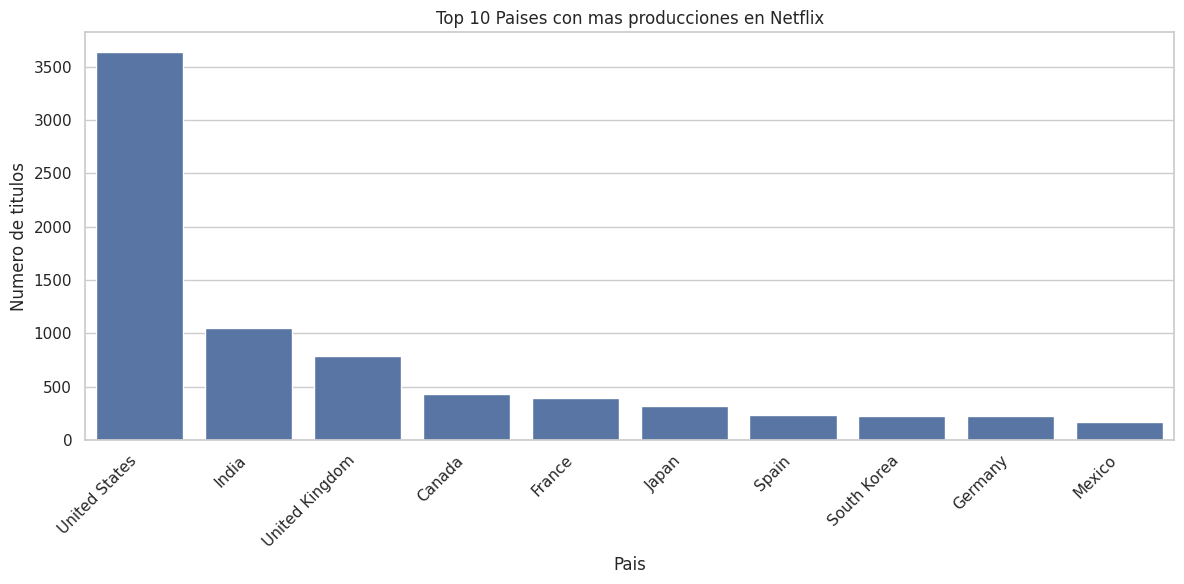

<Figure size 1400x700 with 0 Axes>

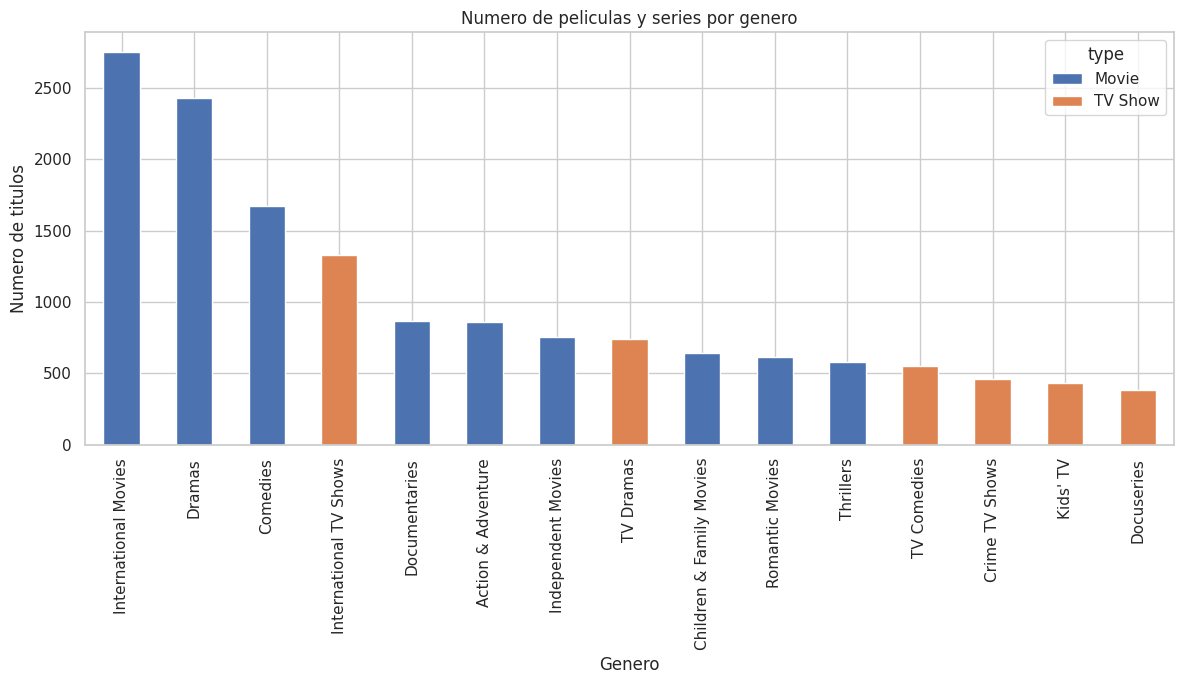

/tmp/ipython-input-1838256322.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['release_year'] = movies_df['release_year'].astype(int)


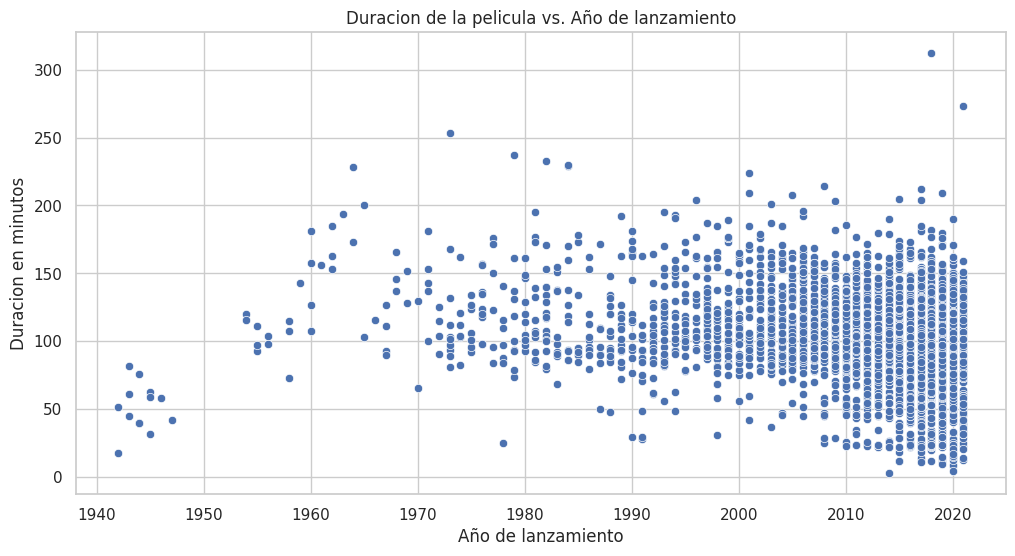

In [ ]:
# FIXME

# 7.
countries_df = df['country'].str.split(',', expand=True).stack()
countries_df = countries_df.str.strip()
top_countries = countries_df.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Paises con mas producciones en Netflix')
plt.xlabel('Pais')
plt.ylabel('Numero de titulos')
plt.tight_layout()
plt.show()

# 8.
genres_df = df['listed_in'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
genres_df = genres_df.merge(df[['show_id', 'type']], left_index=True, right_index=True)
genres_df['genre'] = genres_df['genre'].str.strip()
genre_type_counts = genres_df.groupby(['genre', 'type']).size().unstack(fill_value=0)
top_genres = genre_type_counts.sum(axis=1).sort_values(ascending=False).head(15).index
genre_type_counts_filtered = genre_type_counts.loc[top_genres]

plt.figure(figsize=(14, 7))
genre_type_counts_filtered.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Numero de peliculas y series por genero')
plt.xlabel('Genero')
plt.ylabel('Numero de titulos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 9.
movies_df['release_year'] = movies_df['release_year'].astype(int)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='release_year', y='duration_minutes', data=movies_df)
plt.title('Duracion de la pelicula vs. Año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Duracion en minutos')
plt.show()

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

**R:** Al igual que en el gráfico circular anterior, los ratings están bastante cercanos entre público adulto y público joven, sin embargo, destacan por tener un mayor público adulto los géneros de International Movies, International Tv Shows y Dramas. Por otro lado, aquellos dirigidos a un público más familiar o infantil son Kids'TV, Comedies y Children & Family Movies.

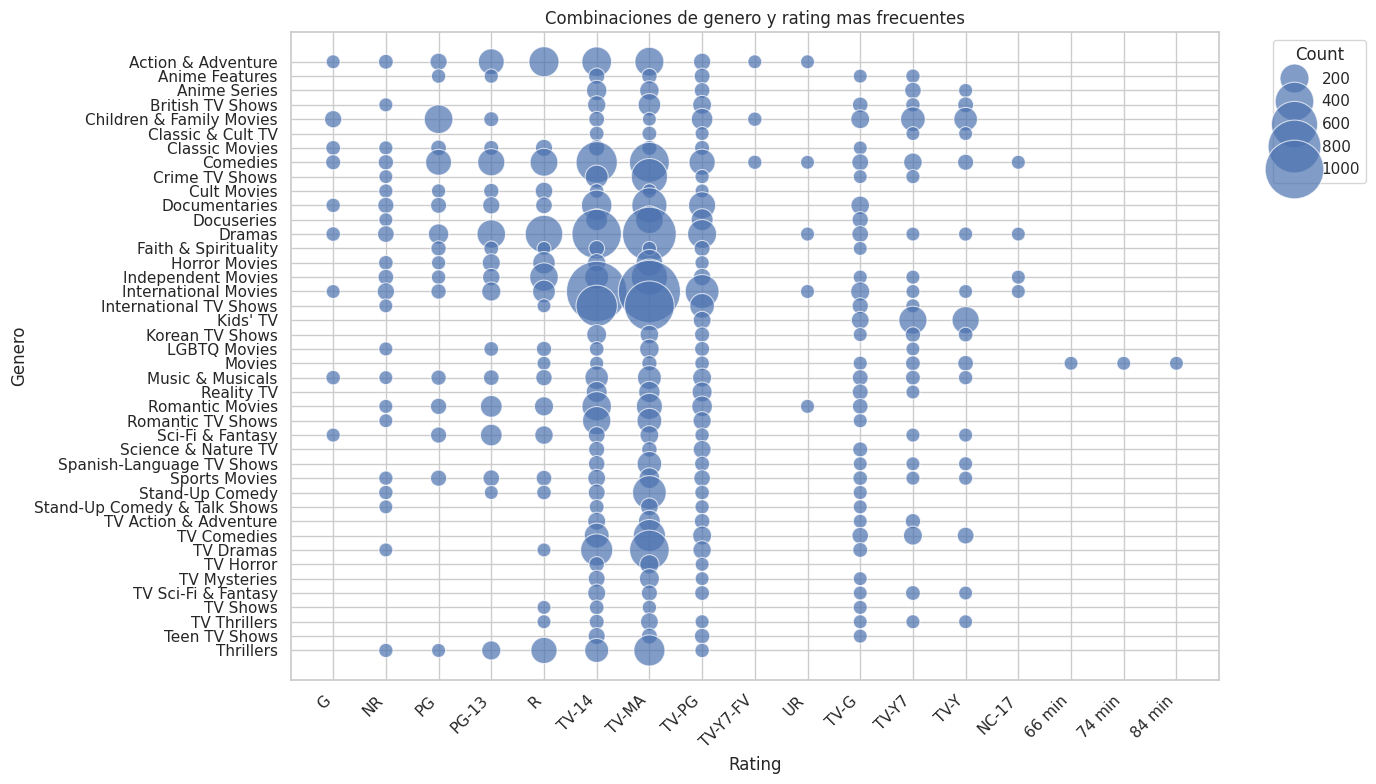

In [ ]:
# Primero creamos un DataFrame con las combinaciones de genero y rating
# y separamos la columna de generos para crear el DataFrame con una fila por genero
genre_rating_df = df['listed_in'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
genre_rating_df = genre_rating_df.merge(df[['show_id', 'rating']], left_index=True, right_index=True)
genre_rating_df['genre'] = genre_rating_df['genre'].str.strip()

# Borramos filas con rating vacios
genre_rating_df.dropna(subset=['rating'], inplace=True)

# Agrupamos por genero y rating y contamos el numero de titulos
genre_rating_counts = genre_rating_df.groupby(['genre', 'rating']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.scatterplot(data=genre_rating_counts, x='rating', y='genre', size='count', sizes=(100, 2000), alpha=0.7)
plt.title('Combinaciones de genero y rating mas frecuentes')
plt.xlabel('Rating')
plt.ylabel('Genero')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()